<a href="https://colab.research.google.com/github/toastmaker/ccf/blob/master/ccf_ml_gp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot  as plt
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
copypath = '/content/drive/My Drive/data/lightcurve_array.npz'
npz=np.load(copypath)
xdata=npz['lc'][:,:-1] # to make the legth of the two concatenated light curves an even number
ydata=npz['delay']
xdata.shape

(9999, 9998)

In [ ]:
xdata = xdata/np.max(xdata,axis=1)[:,np.newaxis]

Delay is 0.050


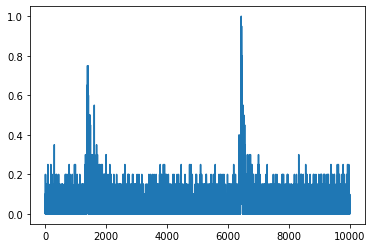

In [ ]:
lc0 = xdata[0]
plt.plot(lc0)
print("Delay is {:.3f}".format(ydata[0]))

In [ ]:
def ccf(x):
  half = len(x)//2
  a, b = x[0:half], x[half:]
  a = (a - np.mean(a)) / (np.std(a) * len(a))
  b = (b - np.mean(b)) / (np.std(b))
  return np.correlate(a,b,'same')

In [ ]:
def ccf_cumsum(x,dd=False):
  half = len(x)//2 
  cs1 = np.cumsum(x[0:half])
  cs2 = np.cumsum(x[half:])
  cs1 /= np.max(cs1)
  cs2 /= np.max(cs2)
  if dd:
    cs1 = np.diff(np.diff(cs1))
    cs2 = np.diff(np.diff(cs2))
  return np.correlate(cs1,cs2,'same')

2448

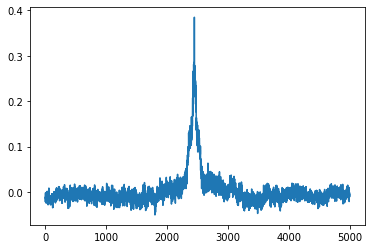

In [ ]:
ccf_lc0 = ccf(lc0)
plt.plot(ccf_lc0)
np.argmax(ccf_lc0)

In [ ]:
ccfdata = np.apply_along_axis(func1d=ccf, axis=1, arr=xdata)

In [10]:
ccfdata.shape

(9999, 4999)

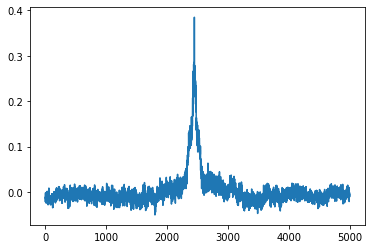

In [11]:
ccfdata_preview =  ccfdata[0]
plt.plot(ccfdata_preview)

8.526512829121202e-17 1.0


(9999, 500)

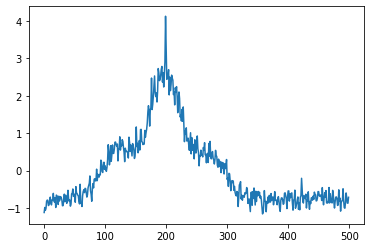

In [14]:
nbins_full = ccfdata.shape[1]
xtrain = np.copy(ccfdata[:,nbins_full//2-250:nbins_full//2+250])
#z = (x - u) / s
xtrain = (xtrain - np.mean(xtrain, axis=1)[:,None])/np.std(xtrain,axis=1)[:,None]
plt.plot(xtrain[0])
print(np.mean(xtrain[0]), np.std(xtrain[0]))
xtrain.shape

In [15]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, DotProduct, WhiteKernel

In [16]:
def gprocess(x, downsample=2):
  n = len(x)
  kernel = 1.0*RBF(2.0) + WhiteKernel()
  gp = GaussianProcessRegressor(kernel=kernel, random_state=0)
  X = np.atleast_2d(np.linspace(0,n,n)).T
  y = np.atleast_2d(x).T
  gp.fit(X,y)
  X2 = np.atleast_2d(np.linspace(0, n, downsample*n)).T
  f = gp.predict(X2)
  return f.ravel()

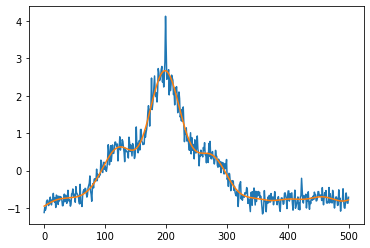

In [17]:
downsample = 4
gp_smooth = gprocess(xtrain[0], downsample=downsample)
n = len(xtrain[0])
plt.plot(np.linspace(0, n, n), xtrain[0])
plt.plot(np.linspace(0, n, downsample*n), gp_smooth)

In [21]:
Nsamples = xtrain.shape[0]
kernel = 1.0*RBF(2.0) + WhiteKernel()
gp = GaussianProcessRegressor(kernel=kernel, random_state=0)
X = np.atleast_2d(np.linspace(0,n,n)).T
X2 = np.atleast_2d(np.linspace(0, n, downsample*n)).T
xtrain_smooth = np.empty((Nsamples, downsample*n))
for i in range(Nsamples):
  y = xtrain[i,:]
  gp.fit(X,y)
  if i%100 == 0:
    print(f'Step {i} of {Nsamples}')
  xtrain_smooth[i,:] = gp.predict(X2)

Step 0 of 9999
Step 100 of 9999
Step 200 of 9999
Step 300 of 9999
Step 400 of 9999
Step 500 of 9999
Step 600 of 9999
Step 700 of 9999
Step 800 of 9999
Step 900 of 9999
Step 1000 of 9999
Step 1100 of 9999
Step 1200 of 9999
Step 1300 of 9999
Step 1400 of 9999
Step 1500 of 9999
Step 1600 of 9999
Step 1700 of 9999
Step 1800 of 9999
Step 1900 of 9999
Step 2000 of 9999
Step 2100 of 9999
Step 2200 of 9999
Step 2300 of 9999
Step 2400 of 9999
Step 2500 of 9999
Step 2600 of 9999
Step 2700 of 9999
Step 2800 of 9999
Step 2900 of 9999
Step 3000 of 9999
Step 3100 of 9999
Step 3200 of 9999
Step 3300 of 9999
Step 3400 of 9999
Step 3500 of 9999
Step 3600 of 9999
Step 3700 of 9999
Step 3800 of 9999
Step 3900 of 9999
Step 4000 of 9999
Step 4100 of 9999
Step 4200 of 9999
Step 4300 of 9999
Step 4400 of 9999
Step 4500 of 9999
Step 4600 of 9999


/usr/local/lib/python3.6/dist-packages/sklearn/gaussian_process/_gpr.py:494: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


Step 4700 of 9999
Step 4800 of 9999
Step 4900 of 9999
Step 5000 of 9999
Step 5100 of 9999
Step 5200 of 9999
Step 5300 of 9999
Step 5400 of 9999
Step 5500 of 9999
Step 5600 of 9999
Step 5700 of 9999
Step 5800 of 9999
Step 5900 of 9999
Step 6000 of 9999
Step 6100 of 9999
Step 6200 of 9999
Step 6300 of 9999
Step 6400 of 9999
Step 6500 of 9999
Step 6600 of 9999
Step 6700 of 9999
Step 6800 of 9999
Step 6900 of 9999
Step 7000 of 9999
Step 7100 of 9999
Step 7200 of 9999
Step 7300 of 9999
Step 7400 of 9999
Step 7500 of 9999
Step 7600 of 9999
Step 7700 of 9999
Step 7800 of 9999
Step 7900 of 9999
Step 8000 of 9999
Step 8100 of 9999
Step 8200 of 9999
Step 8300 of 9999
Step 8400 of 9999
Step 8500 of 9999
Step 8600 of 9999
Step 8700 of 9999
Step 8800 of 9999
Step 8900 of 9999
Step 9000 of 9999
Step 9100 of 9999
Step 9200 of 9999
Step 9300 of 9999
Step 9400 of 9999
Step 9500 of 9999
Step 9600 of 9999
Step 9700 of 9999
Step 9800 of 9999
Step 9900 of 9999


In [23]:
np.savez('/content/drive/My Drive/data/xtrain.npz',xtrain)

In [22]:
np.savez('/content/drive/My Drive/data/xtrain_smooth.npz',xtrain_smooth)

In [24]:
# xtrain_smooth = np.apply_along_axis(func1d=gprocess, axis=1, arr=xtrain, downsample=4)

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(xtrain, ydata, test_size=0.33, random_state=42)
orig_dim=X[0].shape
X_train.shape, y_train.shape

((6699, 500), (6699,))

In [26]:
model = Sequential()
model.add(Dense(units=48, input_shape=(orig_dim),activation='sigmoid'))
model.add(Dropout(0.1))
model.add(Dense(units=24,activation='sigmoid'))
model.add(Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adamax')

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 48)                24048     
_________________________________________________________________
dropout (Dropout)            (None, 48)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 24)                1176      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 25        
Total params: 25,249
Trainable params: 25,249
Non-trainable params: 0
_________________________________________________________________


In [30]:
nepochs = 100
batch_size = 100
history = model.fit(X_train,y_train,epochs=nepochs,batch_size=batch_size, validation_data=(X_test,y_test))

Epoch 1/100
67/67 [==============================] - 0s 3ms/step - loss: 0.0519 - val_loss: 0.0010
Epoch 2/100
67/67 [==============================] - 0s 2ms/step - loss: 0.0038 - val_loss: 6.2480e-04
Epoch 3/100
67/67 [==============================] - 0s 2ms/step - loss: 0.0035 - val_loss: 4.8087e-04
Epoch 4/100
67/67 [==============================] - 0s 2ms/step - loss: 0.0031 - val_loss: 3.7248e-04
Epoch 5/100
67/67 [==============================] - 0s 2ms/step - loss: 0.0030 - val_loss: 2.8648e-04
Epoch 6/100
67/67 [==============================] - 0s 2ms/step - loss: 0.0027 - val_loss: 2.4381e-04
Epoch 7/100
67/67 [==============================] - 0s 2ms/step - loss: 0.0026 - val_loss: 2.2431e-04
Epoch 8/100
67/67 [==============================] - 0s 2ms/step - loss: 0.0026 - val_loss: 1.9695e-04
Epoch 9/100
67/67 [==============================] - 0s 2ms/step - loss: 0.0025 - val_loss: 1.9533e-04
Epoch 10/100
67/67 [==============================] - 0s 2ms/step - loss: 0.0

In [31]:
model.save('/content/drive/My Drive/data/my_ccfmodel')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /content/drive/My Drive/data/my_ccfmodel/assets


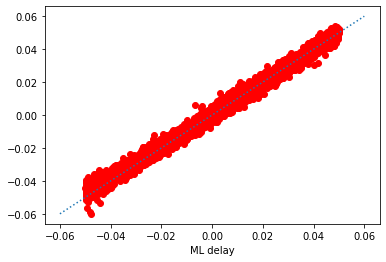

In [32]:
y_pred = model.predict(X_test)
plt.scatter(y_test,y_pred,color="r")
plt.xlabel("True delay")
plt.xlabel("ML delay")
plt.plot([-0.06,0.06],[-0.06,0.06],':')

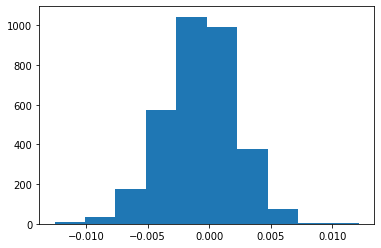

In [33]:
diff = y_test - y_pred.ravel()
hist = plt.hist(diff)

In [38]:
def howGoodAmI(y_test, y_pred):
  diff = y_test - y_pred.ravel()
  hist = plt.hist(diff)
  bincentres = (hist[1][:-1]+hist[1][1:])/2.
  weights = hist[0]
  mu = np.average(bincentres,weights=weights)
  sigma = np.average((bincentres-mu)**2, weights=weights)
  return mu, sigma

(-0.0007090793071596902, 9.005434208675105e-06)

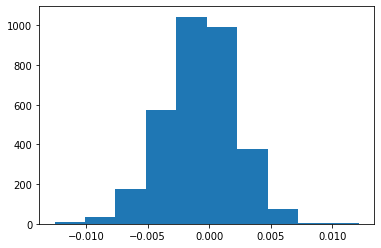

In [39]:
howGoodAmI(y_test, y_pred)

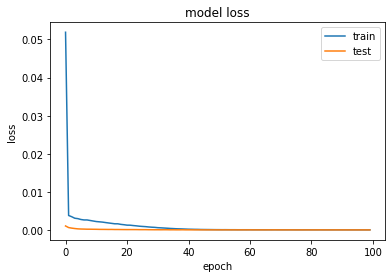

In [55]:
# summarize history for loss
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()

In [43]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [51]:
#scaler = StandardScaler()
#X_train_ = scaler.fit_transform(X_train)
#pca = PCA(n_components=100)
X_train_pca = pca.fit_transform(X_train)

In [53]:
gbr = GradientBoostingRegressor(random_state=0)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=0, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

(-0.06, 0.06)

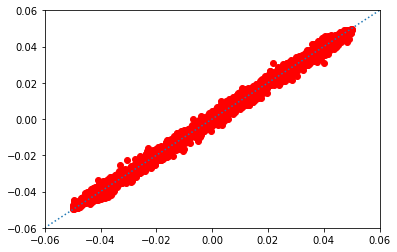

In [57]:
y_pred = gbr.predict(X_test)
plt.scatter(y_test,y_pred,color="r")
plt.plot([-0.06,0.06],[-0.06,0.06],':')
plt.xlim([-0.06,0.06])
plt.ylim([-0.06,0.06])

(-2.2205126762711542e-05, 4.57860436346896e-06)

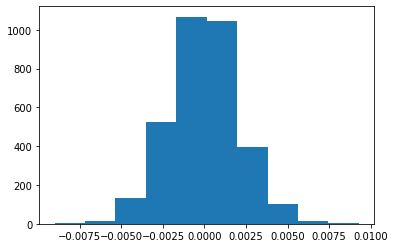

In [58]:
howGoodAmI(y_test, y_pred)

In [64]:
len(np.unique(ydata)), len(np.unique(np.around(ydata, decimals=4)))

(9999, 1000)

In [65]:
ydata[0], np.around(ydata[0], decimals=4)

(0.0499741748906672, 0.05)